# EDA - Numeric Fields

Initial comparison between successful request and unsuccessful requests

In [1]:
#package imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Load data
training_data = pd.read_json("train.json")
test_data = pd.read_json("test.json")

In [3]:
# Look at fields used in the test data
test_data.columns

Index(['giver_username_if_known', 'request_id', 'request_text_edit_aware',
       'request_title', 'requester_account_age_in_days_at_request',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_subreddits_at_request',
       'requester_subreddits_at_request',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_request', 'requester_username',
       'unix_timestamp_of_request', 'unix_timestamp_of_request_utc'],
      dtype='object')

In [4]:
# Look at the fields available in the training data
training_data.columns

Index(['giver_username_if_known',
       'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval', 'post_was_edited',
       'request_id', 'request_number_of_comments_at_retrieval', 'request_text',
       'request_text_edit_aware', 'request_title',
       'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_at_retrieval',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_number_of_subreddits_at_request', 'r

In [5]:
# Store the columns that are usable for the predictions
features = list(test_data.columns)

## Baseline Info

In [6]:
# Baseline - how many users receive a pizza
# If received pizza, requester_received_pizza == True
print("Number of answered requests:", np.sum(training_data["requester_received_pizza"]))
print("Total requests:", len(training_data))

print(f'Baseline success rate: {np.mean(training_data["requester_received_pizza"]):.4f}')

Number of answered requests: 994
Total requests: 4040
Baseline success rate: 0.2460


## Check for nulls

In [7]:
print(training_data.isnull().sum())

giver_username_if_known                                    0
number_of_downvotes_of_request_at_retrieval                0
number_of_upvotes_of_request_at_retrieval                  0
post_was_edited                                            0
request_id                                                 0
request_number_of_comments_at_retrieval                    0
request_text                                               0
request_text_edit_aware                                    0
request_title                                              0
requester_account_age_in_days_at_request                   0
requester_account_age_in_days_at_retrieval                 0
requester_days_since_first_post_on_raop_at_request         0
requester_days_since_first_post_on_raop_at_retrieval       0
requester_number_of_comments_at_request                    0
requester_number_of_comments_at_retrieval                  0
requester_number_of_comments_in_raop_at_request            0
requester_number_of_comm

In [8]:
print(test_data.isnull().sum())

giver_username_if_known                               0
request_id                                            0
request_text_edit_aware                               0
request_title                                         0
requester_account_age_in_days_at_request              0
requester_days_since_first_post_on_raop_at_request    0
requester_number_of_comments_at_request               0
requester_number_of_comments_in_raop_at_request       0
requester_number_of_posts_at_request                  0
requester_number_of_posts_on_raop_at_request          0
requester_number_of_subreddits_at_request             0
requester_subreddits_at_request                       0
requester_upvotes_minus_downvotes_at_request          0
requester_upvotes_plus_downvotes_at_request           0
requester_username                                    0
unix_timestamp_of_request                             0
unix_timestamp_of_request_utc                         0
dtype: int64


In [9]:
test_data.dtypes

giver_username_if_known                                object
request_id                                             object
request_text_edit_aware                                object
request_title                                          object
requester_account_age_in_days_at_request              float64
requester_days_since_first_post_on_raop_at_request    float64
requester_number_of_comments_at_request                 int64
requester_number_of_comments_in_raop_at_request         int64
requester_number_of_posts_at_request                    int64
requester_number_of_posts_on_raop_at_request            int64
requester_number_of_subreddits_at_request               int64
requester_subreddits_at_request                        object
requester_upvotes_minus_downvotes_at_request            int64
requester_upvotes_plus_downvotes_at_request             int64
requester_username                                     object
unix_timestamp_of_request                               int64
unix_tim

## Create EDA df that includes labels

In [10]:
# Create list of features that includes success/fail
eda_features = features.copy()
eda_features.append('requester_received_pizza')

# Create training df
eda_training =  training_data[training_data.columns[training_data.columns.isin(eda_features)]]
eda_training.shape

# Create list of numeric col
numeric_col = [col for col in eda_training if eda_training[col].dtype != 'object']

# Split into success/fail
pizza_eda = eda_training[eda_training['requester_received_pizza'] == True]
no_pizza_eda = eda_training[eda_training['requester_received_pizza'] == False]

In [11]:
# Find time and day of week
def split_day_hour(df):
    weekday = []
    req_hour = []

    for i in df['unix_timestamp_of_request']:
        dt = datetime.datetime.fromtimestamp(i)
        weekday.append(dt.date().weekday())
        req_hour.append(dt.time().hour)
    
    return weekday, req_hour

In [12]:
p_day, p_hour = split_day_hour(pizza_eda)
n_day, n_hour = split_day_hour(no_pizza_eda)

pizza_eda['weekday'] = p_day
pizza_eda['req_hour'] = p_hour
no_pizza_eda['weekday'] = n_day
no_pizza_eda['req_hour'] = n_hour

/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_91086/1155915704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza_eda['weekday'] = p_day
/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_91086/1155915704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza_eda['req_hour'] = p_hour
/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_91086/1155915704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [13]:
print(numeric_col)

['requester_account_age_in_days_at_request', 'requester_days_since_first_post_on_raop_at_request', 'requester_number_of_comments_at_request', 'requester_number_of_comments_in_raop_at_request', 'requester_number_of_posts_at_request', 'requester_number_of_posts_on_raop_at_request', 'requester_number_of_subreddits_at_request', 'requester_received_pizza', 'requester_upvotes_minus_downvotes_at_request', 'requester_upvotes_plus_downvotes_at_request', 'unix_timestamp_of_request', 'unix_timestamp_of_request_utc']


In [14]:
# Check account age distribution
pizza_eda['requester_account_age_in_days_at_request'].describe()

count     994.000000
mean      276.766844
std       312.791210
min         0.000000
25%        39.110437
50%       179.528218
75%       396.927688
max      2124.362650
Name: requester_account_age_in_days_at_request, dtype: float64

In [15]:
# Create normalized dataframes
norm_pizza_eda = (pizza_eda - pizza_eda.mean())/pizza_eda.std()
norm_no_pizza_eda = (no_pizza_eda - no_pizza_eda.mean())/no_pizza_eda.std()


/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_91086/2033242333.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  norm_pizza_eda = (pizza_eda - pizza_eda.mean())/pizza_eda.std()
/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_91086/2033242333.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  norm_pizza_eda = (pizza_eda - pizza_eda.mean())/pizza_eda.std()
/var/folders/b1/zqzn387j6zd37gnn4xj6ym200000gn/T/ipykernel_91086/2033242333.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is d

## Histograms comparing success/fail requests by numeric fields

In [16]:
def plot_hist(col, 
              values_label, 
              title_label, 
              df1= pizza_eda, 
              df2= no_pizza_eda,
              bins = 5,
              range = None,
              histtype = 'bar',
              align = 'left',
              log = False
              ):
    '''Plot histogram for the numeric fields
    
    Arguments: 
        column of interest,
        column name/label for x-axis,
        title name,
        dataframes to compare,
        histogram arguments for customization - refer to plt documentation
        
    Returns: plot
    '''
    
    plt.hist([df1[col], df2[col]],
         label=['Pizza', 'No Pizza'],
         bins = bins,
         range = range,
         histtype = histtype,
         align = align)
    plt.xlabel(values_label)
    plt.ylabel('Count')
    plt.title(title_label)
    plt.legend()
    plt.show()

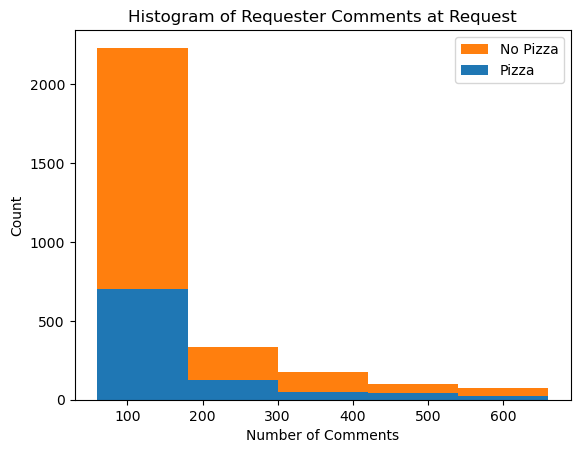

In [17]:
plot_hist(col='requester_number_of_comments_at_request', 
         title_label='Histogram of Requester Comments at Request',
         values_label = 'Number of Comments',
         bins = 5,
         range = [0, 600],
         histtype = 'stepfilled',
         align = 'right',
         log = True)

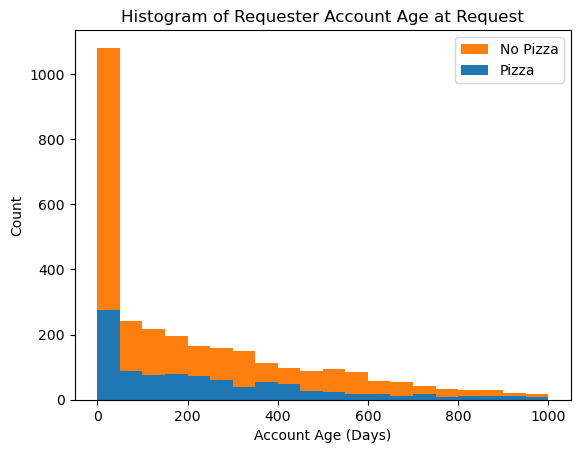

In [18]:
plot_hist(col='requester_account_age_in_days_at_request', 
          values_label = 'Account Age (Days)',
          title_label='Histogram of Requester Account Age at Request',
         bins = 20,
         range = [0, 1000],
         histtype = 'stepfilled',
         align = 'mid',
         log = True)

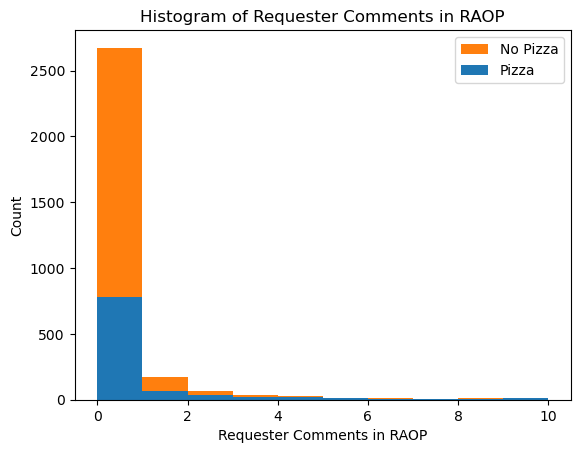

In [19]:
plot_hist(col='requester_number_of_comments_in_raop_at_request', 
          values_label = 'Requester Comments in RAOP',
          title_label='Histogram of Requester Comments in RAOP',
        bins = 10,
        range = [0, 10],
        histtype = 'stepfilled',
        align = 'mid')

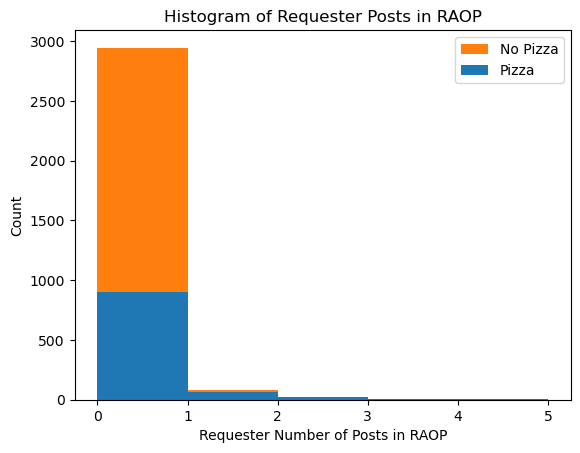

In [20]:
plot_hist(col='requester_number_of_posts_on_raop_at_request', 
        values_label = 'Requester Number of Posts in RAOP',
        title_label='Histogram of Requester Posts in RAOP',
        bins = 5,
        range = [0, 5],
        histtype = 'stepfilled',
        align = 'mid')

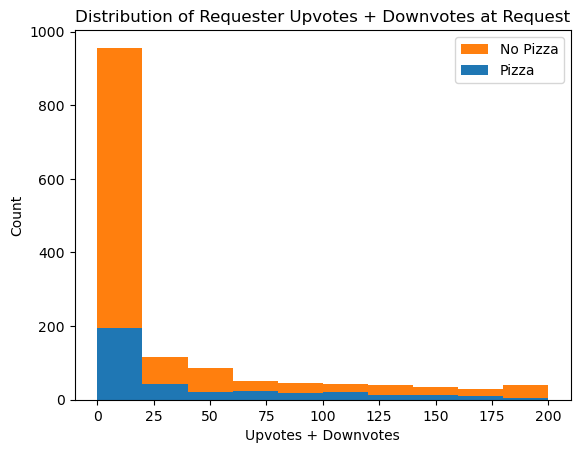

In [21]:
plot_hist(col='requester_upvotes_plus_downvotes_at_request', 
          values_label = 'Upvotes + Downvotes',
          title_label='Distribution of Requester Upvotes + Downvotes at Request',
        bins = 10,
        range = [0, 200],
        histtype = 'stepfilled',
        align = 'mid')

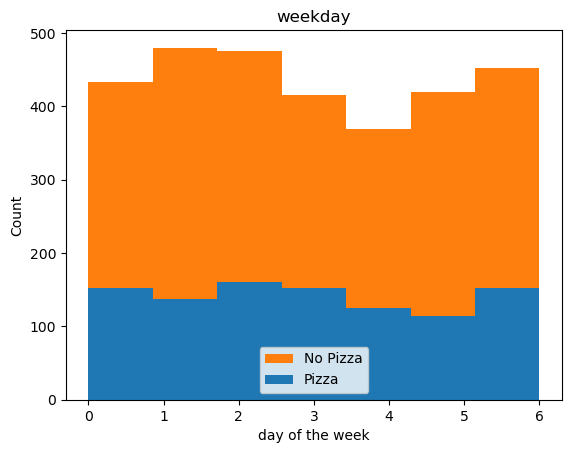

In [29]:
plot_hist(col='weekday', 
          values_label = 'day of the week',
          title_label='weekday',
        bins = 7,
        range = [0, 6],
        histtype = 'stepfilled',
        align = 'mid')

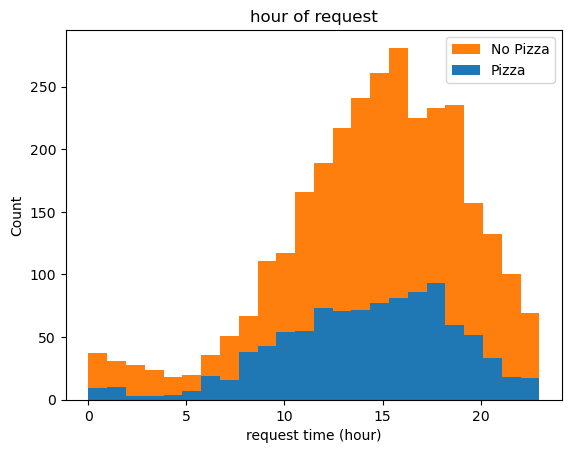

In [31]:
plot_hist(col='req_hour', 
          values_label = 'request time (hour)',
          title_label='hour of request',
        bins = 24,
        range = [0, 23],
        histtype = 'stepfilled',
        align = 'mid')

## Check numeric field correlation

In [22]:
corr_table = eda_training.corr(numeric_only = True)

corr_table

,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_received_pizza,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc
requester_account_age_in_days_at_request,1.000000,0.231437,0.488341,0.054243,0.411907,0.033078,0.588118,0.041784,0.271963,0.115681,0.330437,0.330431
requester_days_since_first_post_on_raop_at_request,0.231437,1.000000,0.204728,0.354446,0.099312,0.292962,0.193807,0.098225,0.112943,0.078312,0.172005,0.172002
requester_number_of_comments_at_request,0.488341,0.204728,1.000000,0.122674,0.390735,0.068309,0.755857,0.033779,0.400108,0.162262,0.305059,0.305054
requester_number_of_comments_in_raop_at_request,0.054243,0.354446,0.122674,1.000000,0.019334,0.487150,0.082610,0.131296,0.129595,0.131645,0.048248,0.048248
requester_number_of_posts_at_request,0.411907,0.099312,0.390735,0.019334,1.000000,0.046357,0.598358,0.020612,0.545885,0.359416,0.135283,0.135281
requester_number_of_posts_on_raop_at_request,0.033078,0.292962,0.068309,0.487150,0.046357,1.000000,0.053959,0.137208,0.122886,0.130172,0.097666,0.097660
requester_number_of_subreddits_at_request,0.588118,0.193807,0.755857,0.082610,0.598358,0.053959,1.000000,0.037647,0.411542,0.184077,0.334743,0.334740
requester_received_pizza,0.041784,0.098225,0.033779,0.131296,0.020612,0.137208,0.037647,1.000000,0.032571,0.026102,-0.103348,-0.103346
requester_upvotes_minus_downvotes_at_request,0.271963,0.112943,0.400108,0.129595,0.545885,0.122886,0.411542,0.032571,1.000000,0.916014,0.177113,0.177113
requester_upvotes_plus_downvotes_at_request,0.115681,0.078312,0.162262,0.131645,0.359416,0.130172,0.184077,0.026102,0.916014,1.000000,0.089730,0.089731


## Check means across numeric fields for differences

In [23]:
pizza_eda_num = pizza_eda[pizza_eda.columns[pizza_eda.columns.isin(numeric_col)]]
no_pizza_eda_num = no_pizza_eda[no_pizza_eda.columns[no_pizza_eda.columns.isin(numeric_col)]]

In [24]:

for col in numeric_col:
    print(col)
    print('pizza mean:', np.mean(pizza_eda_num[col]))
    print('no pizza mean:', np.mean(no_pizza_eda_num[col]))
    print('difference:', np.mean(pizza_eda_num[col]) - np.mean(no_pizza_eda_num[col]))
    print()

requester_account_age_in_days_at_request
pizza mean: 276.76684350314855
no pizza mean: 247.34850245692593
difference: 29.418341046222622

requester_days_since_first_post_on_raop_at_request
pizza mean: 28.56375706787018
no pizza mean: 12.453198521588726
difference: 16.110558546281453

requester_number_of_comments_at_request
pizza mean: 126.52816901408451
no pizza mean: 111.36835193696652
difference: 15.159817077117992

requester_number_of_comments_in_raop_at_request
pizza mean: 1.4295774647887325
no pizza mean: 0.3890347997373605
difference: 1.040542665051372

requester_number_of_posts_at_request
pizza mean: 23.43762575452716
no pizza mean: 21.002298095863427
difference: 2.4353276586637342

requester_number_of_posts_on_raop_at_request
pizza mean: 0.14185110663983905
no pizza mean: 0.03808273145108339
difference: 0.10376837518875566

requester_number_of_subreddits_at_request
pizza mean: 19.509054325955734
no pizza mean: 17.609323703217335
difference: 1.8997306227383994

requester_receive

## Check account age to verify if rules are being followed

RAOP rules state accounts must be older than 90 days old at time of request

In [25]:
# % of successful accounts less than 90 days old
pizza_eda[
    'requester_account_age_in_days_at_request'
][
    pizza_eda['requester_account_age_in_days_at_request'] < 90
].count() / len(pizza_eda)

0.3501006036217304

In [26]:
# % of unsuccessful accounts less than 90 days old
no_pizza_eda[
    'requester_account_age_in_days_at_request'
][
    no_pizza_eda['requester_account_age_in_days_at_request'] < 90
].count() / len(no_pizza_eda)

0.41661195009848984

In [27]:
# Check how many successful requester accounts are 0 days old (total success = 994)
len(pizza_eda[pizza_eda['requester_account_age_in_days_at_request'] == 0])

141

In [28]:
# Check how many nonsuccessful requester accounts are older than 0 days (total fail = 3046)
len(no_pizza_eda[no_pizza_eda['requester_account_age_in_days_at_request'] == 0])

760

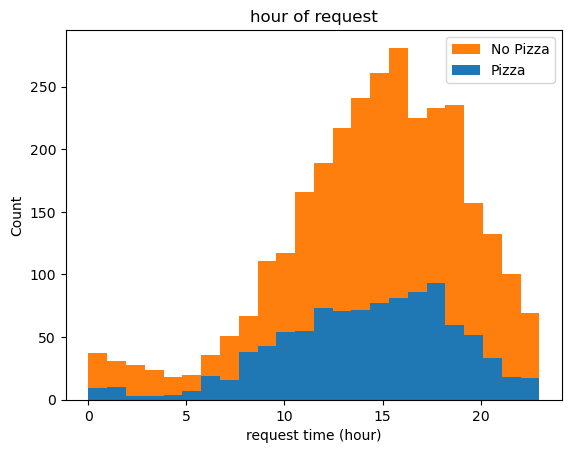